In [1]:
import numpy as np

from astropy.table import QTable
import astropy.units as u

import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/')
from Pipe3D_rotation_curve import extract_data, calc_rot_curve
#from DRP_rotation_curve import extract_data, extract_Pipe3d_data, calc_rot_curve
from dark_matter_mass_plottingFunctions_v1 import plot_fitted_rot_curve, plot_fitted_rot_curve_mass

## Galaxies to plot

In [2]:
FILE_IDS = ['7443-12705']

IMAGE_DIR = '../spirals/Images/Pipe3D/'
#IMAGE_DIR = '../spirals/Images/DRP/'

FILE_DIR = '../spirals/Pipe3D-rot_curve_data_files/'
#FILE_DIR = '../spirals/DRP-rot_curve_data_files/'

## Read in data

In [3]:
master_table = QTable.read('../spirals/Pipe3D-master_file_vflag_BB_chi10_alpha10.txt', format='ascii.ecsv')
#master_table = QTable.read('../spirals/Pipe3D-master_file_vflag_tanh_10.txt', format='ascii.ecsv')
#master_table = QTable.read( '../spirals/Pipe3D-master_file_vflag_10.txt', format='ascii.ecsv')
#master_table = QTable.read( '../spirals/Pipe3D-master_file_vflag_10_OLD-LIMITS.txt', format='ascii.ecsv')
#master_table = QTable.read('../spirals/DRPall-master_file_30.txt', format='ascii.ecsv')

PIPE3D_FOLDER = '/Users/kellydouglass/Documents/Research/data/SDSS/dr15/manga/spectro/pipe3d/v2_4_3/2.4.3/'
#MANGA_FOLDER = '../data/MaNGA/MaNGA_DR16/HYB10-GAU-MILESHC/'

# Create fitted rotation curve plots

In [16]:
mass_outputs = {'center_flux': 0.1124136 * (u.erg / (u.cm*u.cm*u.s)), 
                'center_flux_error': 0.00113667 * (u.erg / (u.cm*u.cm*u.s)), 
                'frac_masked_spaxels': 0.11757789535567313, 
                'avg_v_max': 41000 * (u.km / u.s), 
                'avg_r_turn': 0.001 * u.kpc, 
                'avg_alpha': 1.55087997348351, 
                'avg_v_max_sigma': 3.40604692 * (u.km / u.s), 
                'avg_r_turn_sigma': 36.22130423 * u.kpc, 
                #'avg_alpha_sigma': 0.09640421203575725, 
                'avg_chi_square_rot': 3.4315844114078424, 
                'avg_chi_square_ndf': 0.4289480514259803, 
                'pos_v_max': 131.09766187 * (u.km / u.s), 
                'pos_r_turn': 3.59253346 * u.kpc, 
                'pos_alpha': 2.274848557609349, 
                'pos_v_max_sigma': 14.5105768 * (u.km / u.s), 
                'pos_r_turn_sigma': 0.48433744 * u.kpc, 
                #'pos_alpha_sigma': 0.2135535766356284, 
                'pos_chi_square_rot': 4.098234159379062, 
                'pos_chi_square_ndf': 0.5122792699223827, 
                'neg_v_max': 145.30230732 * (u.km / u.s), 
                'neg_r_turn': 5.94307146 * u.kpc, 
                'neg_alpha': 1.139713411147841, 
                'neg_v_max_sigma': 69.32893382 * (u.km / u.s), 
                'neg_r_turn_sigma': 3.66442853 * u.kpc, 
                #'neg_alpha_sigma': 0.21731893602462835, 
                'neg_chi_square_rot': 15.408896506530997, 
                'neg_chi_square_ndf': 1.9261120633163746, 
                'Rmax': 2.45033143 * u.kpc, 
                'Mtot': 1.27889147e+10 * u.solMass, 
                'Mtot_error': 51216135.40656282 * u.solMass, 
                'Mdark': 1.04406025e+10 * u.solMass, 
                'Mdark_error': 51216135.40656282 * u.solMass, 
                'Mstar': 2.34831216e+09 * u.solMass, 
                'Mdark_Mstar_ratio': 4.44600283, 
                'Mdark_Mstar_ratio_error': 0.02180976, 
                'Mtot_Mstar_ratio': 5.44600283, 
                'Mtot_Mstar_ratio_error': 0.02180976, 
                'curve_used': 'avg', 
                'points_cut': 0}

Stellar mass (NSA): 22591842000.0 10.353951
Axis ratio: 0.36180264
Rotation angle: 36.79461669921875 deg
Mr: -20.837583541870117


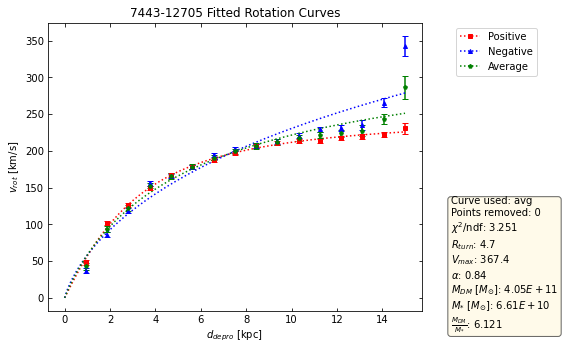

In [5]:
%matplotlib inline

for i in range(len(FILE_IDS)):

    #######################################################################
    # Find galaxy in master_table
    #----------------------------------------------------------------------
    plate, IFU = FILE_IDS[i].split('-')

    plate_boolean = master_table['MaNGA_plate'] == int(plate)
    IFU_boolean = master_table['MaNGA_IFU'] == int(IFU)

    row = master_table[plate_boolean & IFU_boolean]

    print('Stellar mass (NSA):', row['NSA_Mstar'][0], np.log10(row['NSA_Mstar'][0]))
    print('Axis ratio:', row['NSA_ba'][0])
    print('Rotation angle:', row['NSA_phi'][0])
    print('Mr:', row['rabsmag'][0])
    #----------------------------------------------------------------------


    #######################################################################
    # Plot fitted rotation curve
    #----------------------------------------------------------------------
    plot_fitted_rot_curve( FILE_IDS[i], row[0], 'BB', FILE_DIR)
    #plot_fitted_rot_curve( FILE_IDS[i], mass_outputs, 'BB', FILE_DIR)
    #----------------------------------------------------------------------

# Create fitted rotation curve plot with DM, $M_*$ curves

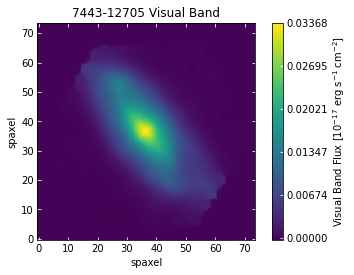

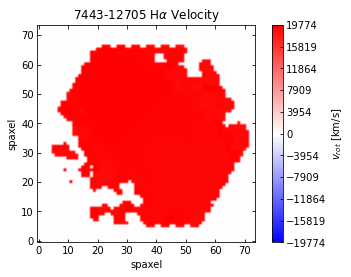

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


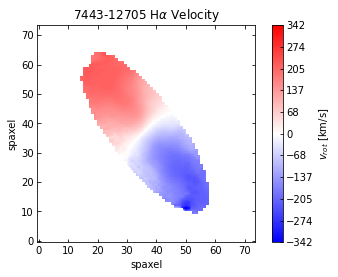

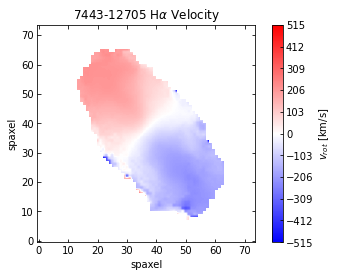

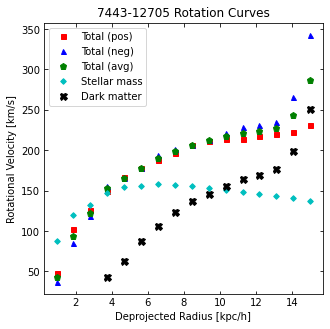

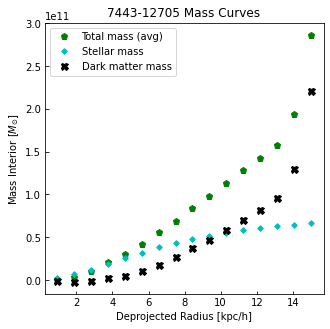

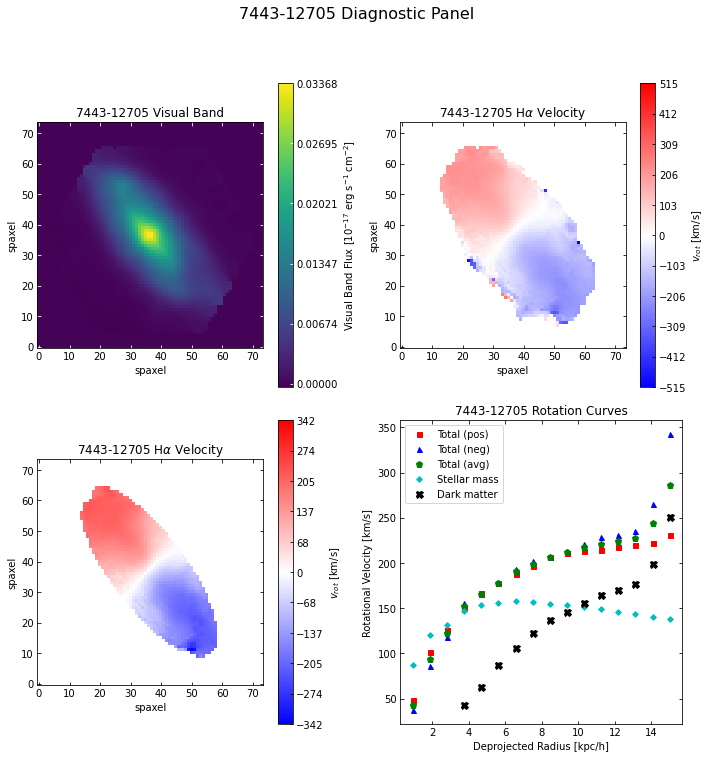

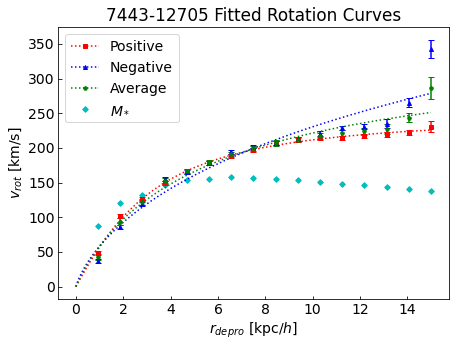

In [4]:
%matplotlib inline

for i in range(len(FILE_IDS)):

    ############################################################################
    # Construct galaxy file name
    #---------------------------------------------------------------------------
    plate, IFU = FILE_IDS[i].split('-')

    #file_name = MANGA_FOLDER + plate + '/manga-' + FILE_IDS[i] + '-MAPS-HYB10-GAU-MILESHC.fits.gz'
    file_name = PIPE3D_FOLDER + plate + '/manga-' + FILE_IDS[i] + '.Pipe3D.cube.fits.gz'
    #---------------------------------------------------------------------------


    ############################################################################
    # Read data from fits file
    #---------------------------------------------------------------------------
    _,_,Ha_vel, Ha_vel_error, v_band, v_band_err, sMass_density,_,_ = extract_data( file_name)
    #Ha_vel, Ha_vel_ivar, Ha_vel_mask, r_band, r_band_ivar = extract_data( file_name)
    #sMass_density = extract_Pipe3d_data( PIPE3D_FOLDER, FILE_IDS[i])
    #---------------------------------------------------------------------------


    ############################################################################
    # Find galaxy in master_table
    #---------------------------------------------------------------------------
    plate_boolean = master_table['MaNGA_plate'] == int(plate)
    IFU_boolean = master_table['MaNGA_IFU'] == int(IFU)
    #IFU_boolean = master_table['MaNGA_fiberID'] == int(IFU)

    row = master_table[plate_boolean & IFU_boolean]
    #print( row['redshift'][0])
    #print( row['NSA_redshift'][0])
    #---------------------------------------------------------------------------


    ############################################################################
    # Extract rotation curve data
    #---------------------------------------------------------------------------
    '''
    rot_data_table,_,_ = calc_rot_curve( Ha_vel, Ha_vel_ivar, Ha_vel_mask,
                                         r_band, r_band_ivar,
                                         sMass_density,
                                         row['ba'][0], row['phi'][0], 
                                         row['redshift'][0], FILE_IDS[i])
    '''
    rot_data_table,_,_ = calc_rot_curve( Ha_vel, Ha_vel_error, v_band, 
                                         v_band_err, sMass_density, 
                                         row['NSA_ba'][0], row['NSA_phi'][0], 
                                         row['NSA_redshift'][0], FILE_IDS[i]
                                         #plot_diagnostics=False
                                       )
    
    #---------------------------------------------------------------------------


    ############################################################################
    # Plot fitted rotation curve
    #---------------------------------------------------------------------------
    plot_fitted_rot_curve_mass( FILE_IDS[i], row[0], 'BB', rot_data_table, 
                                FILE_DIR, DM_plot=False, #IMAGE_DIR=IMAGE_DIR
                              )
    #---------------------------------------------------------------------------